In [42]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
#例4-15
from scipy.stats import poisson, binom
p=poisson.pmf(k=0, mu=1/3)
n=365
mean=binom.expect(args=(n, p))
print('E(Y)=%.2f'%mean)

E(Y)=261.53


In [18]:
#例4-16
from scipy.stats import norm
f=lambda x: 5*x**2
mean=norm.expect(func=f, loc=0, scale=3)
print('E(5X^2)=%.2f'%mean)

E(5X^2)=45.00


In [19]:
#例4-17
from scipy.stats import expon
meanx=expon.expect(scale=1/2)
meany=expon.expect(scale=1/4)
print('E(XY)=%.3f'%(meanx*meany))

E(XY)=0.125


In [20]:
#练习4-9
from scipy.stats import uniform, norm
meanx=norm.expect(scale=2)
meany=uniform.expect(loc=0, scale=4)
print('E(XY)=%.2f'%(meanx*meany))

E(XY)=0.00


In [21]:
#例4-18，例4-32
import numpy as np
from scipy.stats import rv_discrete
X=np.array([1,2,3,4])
P=np.array([37/64, 19/64,7/64, 1/64])
mydist=rv_discrete(values=(X, P))
Ex=mydist.expect()
Dx=mydist.var()
print('E(X)=%.4f'%Ex)
print('D(X)=%.4f'%Dx)

E(X)=1.5625
D(X)=0.5586


In [22]:
#练习4-10
from scipy.stats import rv_discrete
import numpy as np
X=np.array([-2, 0, 2])
P=np.array([0.4,0.3,0.3])
mydist=rv_discrete(values=(X, P))
dist=mydist()
Ex=dist.expect()
Ey=dist.expect(func=lambda x:x**2)
Ez=dist.expect(func=lambda x:3*x**2+5)
print('E(X)=%.1f'%Ex)
print('E(X^2)=%.1f'%Ey)
print('E(3X^2+5)=%.1f'%Ez)

E(X)=-0.2
E(X^2)=2.8
E(3X^2+5)=13.4


In [23]:
#例4-19
import numpy as np
from utility import expect, R
X=np.array([0, 1])
Y=np.array([1, 2, 3])
Pxy=np.array([[R(1,4), R(1,8), R(1,4)],
              [R(1,8), R(1,8), R(1,8)]])
meanx=expect(Pxy, X)
g=lambda x, y: y
meany=expect(Pxy, Yv=Y, func=g)
g=lambda x, y: (x**3)*(y**2)
mean=expect(Pxy, X, Y, g)
print('E(X)=%s'%meanx)
print('E(Y)=%s'%meany)
print('E(X^3Y^2)=%s'%mean)

E(X)=3/8
E(Y)=2
E(X^3Y^2)=7/4


In [24]:
#练习4-11
import numpy as np
from sympy import Rational as R
from utility import expect
X=np.array([1, 2, 3])
Y=np.array([-1, 0, 1])
Pxy=np.array([[0.2, 0.1, 0.1],
              [0.1, 0.0, 0.1],
              [0.0, 0.3, 0.1]])
meanx=expect(Pxy, X)
g=lambda x, y: y
meany=expect(Pxy, Yv=Y, func=g)
g=lambda x, y: y/x
mean=expect(Pxy, X, Y, g)
print('E(X)=%.2f'%meanx)
print('E(Y)=%.2f'%meany)
print('E(Y/X)=%.2f'%mean)

E(X)=2.00
E(Y)=0.00
E(Y/X)=-0.07


In [25]:
#例4-20, 练习4-20
from utility import basecont
import numpy as np
class mydist(basecont):
    def _pdf(self, x):
        if type(x)!=type(np.array([])):
            x=np.array([x])
        y=np.zeros(x.size)
        d=np.where((x>=0)&(x<1500))
        y[d]=x[d]/(1500**2)
        d=np.where((x>=1500)&(x<3000))
        y[d]=(3000-x[d])/(1500**2)
        return y
dist=mydist()
Ex=dist.expect()
Dx=dist.var()
print('E(X)=%.1f,D(X)=%.1f'%(Ex,Dx))

E(X)=1500.0,D(X)=375000.0


In [26]:
#练习4-12, 例4-33
from utility import basecont
import numpy as np
class mydist(basecont):
    def _pdf(self, x):
        y=np.exp(-np.abs(x))/2
        return y
dist=mydist()
Ex=dist.expect()
print('E(X)=%.1f'%Ex)
dist=mydist()
Dx=dist.var()
print('D(X)=%.1f'%Dx)

E(X)=0.0
D(X)=2.0


In [29]:
#例4-21
from utility import expectcont2
f=lambda y, x: 3/(2*x**3*y**2)\
    if (x>1) and (y<x) and (y>1/x)\
    else 0
mean=expectcont2(pdf=f, func=lambda y, x: y)
print('E(Y)=%.2f'%mean)
mean=expectcont2(pdf=f, func=lambda y, x: 1/x/y)
print('E(1/XY)=%.2f'%mean)

E(Y)=0.75
E(1/XY)=0.60


In [30]:
#练习4-13
from utility import expectcont2
import numpy as np
f=lambda y, x: np.exp(-(y+x/y))/y if (x>0)and(y>0) else 0
mean=expectcont2(pdf=f, func=lambda y, x: y)
print('E(Y)=%.2f'%mean)
mean=expectcont2(pdf=f, func=lambda y, x: x)
print('E(X)=%.2f'%mean)
mean=expectcont2(pdf=f, func=lambda y, x: x*y)
print('E(XY)=%.2f'%mean)


E(Y)=1.00
E(X)=1.00
E(XY)=2.00


In [31]:
#例4-31
from scipy.stats import norm, uniform
Dx=norm.var(scale=2)
Ex=norm.expect(scale=2)
Dy=uniform.var(scale=4)
Ey=uniform.expect(scale=4)
print('D(X+Y)=%.4f'%(Dx+Dy))
print('D(2X-3Y)=%.4f'%(4*Dx+9*Dy))

D(X+Y)=5.3333
D(2X-3Y)=28.0000


In [32]:
#练习4-17
from scipy.stats import norm, binom, poisson
Ex1=norm.expect(scale=1)
Ex2=binom.expect(args=(10,0.2))
Ex3=poisson.expect(args=(4,))
print('E(X1-X2-2X3+2)=%.1f'%(Ex1-Ex2-2*Ex3+2))
Dx1=norm.var(scale=1)
Dx2=binom.var(10, 0.2)
Dx3=poisson.var(4)
print('D(X1-X2-2X3+2)=%.1f'%(Dx1+Dx2+4*Dx3))

E(X1-X2-2X3+2)=-8.0
D(X1-X2-2X3+2)=18.6


In [33]:
#练习4-18
from scipy.stats import uniform
Ex=uniform.expect(scale=2)
Ex2=uniform.expect(func=lambda x: x**2, scale=2)
Ex3=uniform.expect(func=lambda x: x**3, scale=2)
Ex4=uniform.expect(func=lambda x: x**4, scale=2)
EA=10*Ex-Ex2
print('E(A)=%.2f'%EA)
EA2=100*Ex2-20*Ex3+Ex4
DA=EA2-EA**2
print('D(A)=%.2f'%DA)

E(A)=8.67
D(A)=21.42


In [34]:
#练习4-19
from scipy.stats import rv_discrete
import numpy as np
X=Y=np.array([10,9,8,7,6,5])
Px=np.array([0.5,0.1,0.1,0.2,0.05,0.05])
Py=np.array([0.4,0.25,0.15,0.05,0.1,0.05])
distx=rv_discrete(values=(X,Px))
disty=rv_discrete(values=(Y,Py))
Ex=distx.expect()
Ey=disty.expect()
Dx=distx.var()
Dy=disty.var()
print('E(X)=%.4f, E(Y)=%.4f'%(Ex,Ey))
print('D(X)=%.4f, D(Y)=%.4f'%(Dx,Dy))

E(X)=8.6500, E(Y)=8.6500
D(X)=2.5275, D(Y)=2.3275


In [35]:
#例4-34
import numpy as np
from utility import expect
from sympy import Rational as R
X=np.array([-1, 0, 1])
Y=np.array([-1, 0, 1])
Pxy=np.array([[R(1,8), R(1,8), R(1,8)],
              [R(1,8), R(0), R(1,8)],
              [R(1,8), R(1,8), R(1,8)]])
Ex=expect(Pxy, X)
Ey=expect(Pxy, Yv=Y, func=lambda x, y: y)
Ex2=expect(Pxy,X, func=lambda x, y: x*x)
Ey2=expect(Pxy, Yv=Y, func=lambda x, y: y*y)
Dx=Ex2-Ex**2
Dy=Ey2-Ey**2
print('D(X)=%s'%Dx)
print('D(Y)=%s'%Dy)

D(X)=3/4
D(Y)=3/4


In [36]:
#练习4-21
import numpy as np
from utility import expect
from sympy import Rational as R
X=np.array([1, 2])
Y=np.array([0, 1, 2, 3])
Pxy=np.array([[R(0), R(3,8), R(3,8), R(0)],
              [R(1,8), R(0), R(0), R(1,8)]])
Ex=expect(Pxy, X)
Ey=expect(Pxy, Yv=Y, func=lambda x, y: y)
Ex2=expect(Pxy,X, func=lambda x, y: x*x)
Ey2=expect(Pxy, Yv=Y, func=lambda x, y: y*y)
Dx=Ex2-Ex**2
Dy=Ey2-Ey**2
print('D(X)=%s'%Dx)
print('D(Y)=%s'%Dy)

D(X)=3/16
D(Y)=3/4


In [37]:
#例4-35
from utility import expectcont2
pdf=lambda y, x: 3*x if(0<x)&(x<1)&(0<y)&(y<x)\
                     else 0
Ey=expectcont2(pdf, lambda y, x: y)
Ey2=expectcont2(pdf, lambda y, x: y**2)
Dy=Ey2-Ey**2
print('E(Y)=%.4f'%Ey)
print('D(Y)=%.4f'%Dy)

E(Y)=0.3751
D(Y)=0.0593


In [38]:
#练习4-22
from utility import expectcont2
pdf=lambda y, x: (x+y)/3 if(0<x)&(x<1)&(0<y)&(y<2)\
                     else 0
Ex=expectcont2(pdf, lambda y, x: x)
Ex2=expectcont2(pdf, lambda y, x: x**2)
Dx=Ex2-Ex**2
print('E(X)=%.4f'%Ex)
print('D(X)=%.4f'%Dx)

E(X)=0.5556
D(X)=0.0802


In [39]:
#例4-37
import numpy as np
from utility import expect, independent, cov
X=np.array([1, 4])
Y=np.array([-2, -1, 1, 2])
Pxy=np.array([[0, 1/4, 1/4, 0],
            [1/4, 0, 0, 1/4]])
Ex=expect(Pxy, X)
Ey=expect(Pxy, Yv=Y, func=lambda x, y:y)
Exy=expect(Pxy, X, Y, func=lambda x, y:x*y)
coviar=cov(Exy, Ex, Ey)
indep=independent(Pxy)
print('X与Y不相关是%s, X与Y相互独立是%s'%(coviar==0, indep))

X与Y不相关是True, X与Y相互独立是False


In [40]:
#练习4-24
import numpy as np
from sympy import Rational as R
from utility import expect, independent, cov
X=np.array([-1, 0, 1])
Y=np.array([-1, 0, 1])
Pxy=np.array([[R(1, 8), R(1, 8), R(1, 8)],
             [R(1, 8), R(0), R(1, 8)],
             [R(1, 8), R(1, 8), R(1, 8)]])
Ex=expect(Pxy, X)
Ey=expect(Pxy, Yv=Y, func=lambda x, y:y)
Exy=expect(Pxy, X, Y, func=lambda x, y:x*y)
coviar=cov(Exy, Ex, Ey)
indep=independent(Pxy)
print('X与Y不相关是%s, X与Y相互独立是%s'%(coviar==0, indep))

X与Y不相关是True, X与Y相互独立是False


In [41]:
#例4-40，练习4-26
import numpy as np
from utility import margDist, expect, rhoxy
X=np.array([1, 2, 3, 4, 5])
Y=np.array([1, 2, 3, 4, 5])
Pxy=np.array([[1/12, 1/24, 1/12, 1/12, 1/24],
             [1/24, 1/24, 1/24, 0, 1/24],
             [0, 1/24, 1/24, 1/24, 1/24],
             [1/24, 1/24, 0, 1/24, 1/24],
             [1/30, 1/30, 1/30, 1/30, 1/30]])
Ex=expect(Pxy, X)
Ex2=expect(Pxy, X, func=lambda x, y: x*x)
sigmax=np.sqrt(Ex2-Ex**2)
Ey=expect(Pxy,Yv=Y, func=lambda x,y:y)
Ey2=expect(Pxy, Yv=Y, func=lambda x, y: y*y)
sigmay=np.sqrt(Ey2-Ey**2)
Exy=expect(Pxy, X, Y, lambda x, y:x*y)
rho=rhoxy(Exy, Ex, Ey, sigmax, sigmay)
a=rho*sigmay/sigmax
b=Ey-a*Ex
print('Y=%.3f*X+%.3f'%(a, b))
a=rho*sigmax/sigmay
b=Ex-a*Ey
print('X=%.3f*Y+%.3f'%(a, b))

Y=0.056*X+2.850
X=0.063*Y+2.479


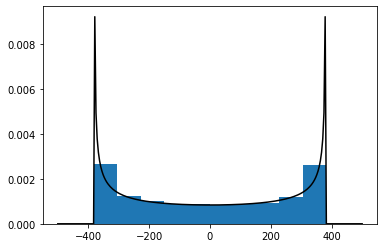

E(V)=-0.0000, D(V)=72200.0000


In [34]:
#程序4.19，4.20
from scipy.stats import rv_continuous
import numpy as np
from matplotlib import pyplot as plt#导入绘图对象plt
class vdist(rv_continuous):
    def _cdf(self, v):
        y=np.zeros(v.size)
        d=np.where((v>-380)&(v<380))
        y[d]=np.arcsin(v[d]/380)/np.pi+1/2
        d=np.where(v>=380)
        y[d]=1
        return y
dist=vdist()
v=np.linspace(-500,500, 256)
plt.plot(v, dist.pdf(v), color='black')
V=dist.rvs(size=10000)
plt.hist(V, density=True, histtype='stepfilled')
plt.show()
Ev=dist.expect()
Dv=dist.var()
print('E(V)=%.4f, D(V)=%.4f'%(Ev, Dv))

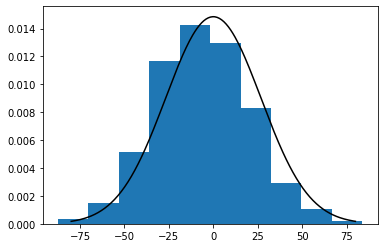

In [33]:
#程序4.21
from scipy.stats import norm 
x=np.array([np.random.choice(a=V, size=100).mean()
            for k in range(500)])
plt.hist(x, density=True, histtype='stepfilled')
v=np.linspace(-80, 80,256)
plt.plot(v, norm.pdf(v, scale=np.sqrt(Dv)/10), color='black')
plt.show()